In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import operator
from scipy.ndimage import gaussian_filter1d
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_loan_data = pd.read_csv('./datasets/Task 3 and 4_Loan_Data.csv')
df_loan_data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [3]:
df_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
df_loan_data_cleaned = df_loan_data.set_index('customer_id').sort_index().copy()
df_loan_data_cleaned

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
1000324,4,5767.234536,21466.067410,105224.98210,6,613,1
1000522,0,4992.982139,4722.321226,61914.15037,4,704,0
1001059,1,5076.742263,8776.446536,93059.12788,6,684,0
1001679,3,4860.480358,24789.669260,101253.64290,2,630,1
1005074,0,3435.674573,5313.489306,57146.22844,3,655,0
...,...,...,...,...,...,...,...
8997104,0,4976.038201,1821.732644,83574.42835,5,607,0
8998011,3,5488.382684,15606.197250,94306.06518,5,641,0
8998628,0,3946.302296,3466.679611,89538.44859,6,677,0


In [5]:
df_loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1000324 to 8999789
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   credit_lines_outstanding  10000 non-null  int64  
 1   loan_amt_outstanding      10000 non-null  float64
 2   total_debt_outstanding    10000 non-null  float64
 3   income                    10000 non-null  float64
 4   years_employed            10000 non-null  int64  
 5   fico_score                10000 non-null  int64  
 6   default                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 625.0 KB


In [6]:
df_loan_data_cleaned['default'] = pd.to_numeric(df_loan_data_cleaned['default'], errors='coerce').astype(float)
df_loan_data_cleaned

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,,,,,,,
1000324,4,5767.234536,21466.067410,105224.98210,6,613,1.0
1000522,0,4992.982139,4722.321226,61914.15037,4,704,0.0
1001059,1,5076.742263,8776.446536,93059.12788,6,684,0.0
1001679,3,4860.480358,24789.669260,101253.64290,2,630,1.0
1005074,0,3435.674573,5313.489306,57146.22844,3,655,0.0
...,...,...,...,...,...,...,...
8997104,0,4976.038201,1821.732644,83574.42835,5,607,0.0
8998011,3,5488.382684,15606.197250,94306.06518,5,641,0.0
8998628,0,3946.302296,3466.679611,89538.44859,6,677,0.0


In [7]:
df_loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1000324 to 8999789
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   credit_lines_outstanding  10000 non-null  int64  
 1   loan_amt_outstanding      10000 non-null  float64
 2   total_debt_outstanding    10000 non-null  float64
 3   income                    10000 non-null  float64
 4   years_employed            10000 non-null  int64  
 5   fico_score                10000 non-null  int64  
 6   default                   10000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 625.0 KB


In [8]:
df_loan_data_cleaned['default_expected_loss'] = df_loan_data_cleaned['default'].replace(1.0, 1.0-0.1).copy()
df_loan_data_cleaned

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,default_expected_loss
customer_id,,,,,,,,
1000324,4,5767.234536,21466.067410,105224.98210,6,613,1.0,0.9
1000522,0,4992.982139,4722.321226,61914.15037,4,704,0.0,0.0
1001059,1,5076.742263,8776.446536,93059.12788,6,684,0.0,0.0
1001679,3,4860.480358,24789.669260,101253.64290,2,630,1.0,0.9
1005074,0,3435.674573,5313.489306,57146.22844,3,655,0.0,0.0
...,...,...,...,...,...,...,...,...
8997104,0,4976.038201,1821.732644,83574.42835,5,607,0.0,0.0
8998011,3,5488.382684,15606.197250,94306.06518,5,641,0.0,0.0
8998628,0,3946.302296,3466.679611,89538.44859,6,677,0.0,0.0


In [9]:
df_loan_data_cleaned.columns.tolist()[0:6]

['credit_lines_outstanding',
 'loan_amt_outstanding',
 'total_debt_outstanding',
 'income',
 'years_employed',
 'fico_score']

In [10]:
X = df_loan_data_cleaned.iloc[:, 0:6]
X

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
customer_id,,,,,,
1000324,4,5767.234536,21466.067410,105224.98210,6,613
1000522,0,4992.982139,4722.321226,61914.15037,4,704
1001059,1,5076.742263,8776.446536,93059.12788,6,684
1001679,3,4860.480358,24789.669260,101253.64290,2,630
1005074,0,3435.674573,5313.489306,57146.22844,3,655
...,...,...,...,...,...,...
8997104,0,4976.038201,1821.732644,83574.42835,5,607
8998011,3,5488.382684,15606.197250,94306.06518,5,641
8998628,0,3946.302296,3466.679611,89538.44859,6,677


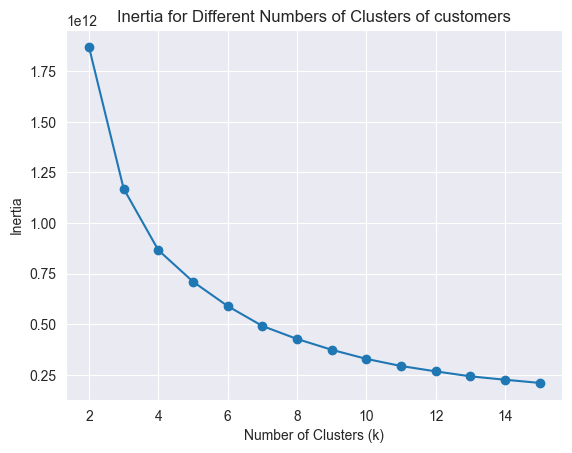

In [11]:
k_values = range(2, 16)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia for Different Numbers of Clusters of customers')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [12]:
clustering_model = KMeans(n_clusters=5).fit(X)
clustering_model

KMeans(n_clusters=5)

In [13]:
cluster_assignments = clustering_model.labels_
df_loan_data_cleaned['Cluster'] = cluster_assignments
df_loan_data_cleaned

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,default_expected_loss,Cluster
customer_id,,,,,,,,,
1000324,4,5767.234536,21466.067410,105224.98210,6,613,1.0,0.9,1
1000522,0,4992.982139,4722.321226,61914.15037,4,704,0.0,0.0,0
1001059,1,5076.742263,8776.446536,93059.12788,6,684,0.0,0.0,3
1001679,3,4860.480358,24789.669260,101253.64290,2,630,1.0,0.9,1
1005074,0,3435.674573,5313.489306,57146.22844,3,655,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
8997104,0,4976.038201,1821.732644,83574.42835,5,607,0.0,0.0,3
8998011,3,5488.382684,15606.197250,94306.06518,5,641,0.0,0.0,3
8998628,0,3946.302296,3466.679611,89538.44859,6,677,0.0,0.0,3


<AxesSubplot:xlabel='income', ylabel='default'>

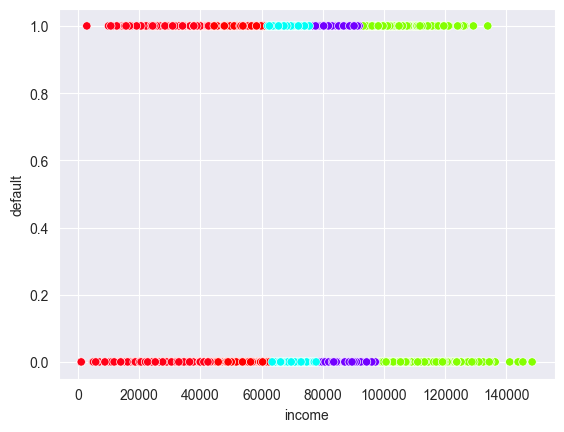

In [14]:
sns.scatterplot(data=df_loan_data_cleaned, x='income', y='default', c=df_loan_data_cleaned['Cluster'], cmap='hsv')

In [15]:
def tree_print(clf, X):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : DecisionTreeClassifier - A tree that has already been fit.
    X : The original training set
    """
    tlevel = _tree_rprint('', clf, X.columns, clf.classes_)
    print('<',end='')
    for i in range(3*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    #       github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation:

    # indent the nodes according to their tree level
    for i in range(tlevel_index):
        print('  |', end='')

    #  TODO: the following should use the TREE_LEAF constant defined in _tree.pyx
    #        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword, end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
        max_label = labels[max_index]
        print(max_label)
        return tlevel_index

    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        print(kword, end=' ' if kword else '')
        print('if {} =< {}: '.format(feature, threshold))
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        ltlevel_index = _tree_rprint('then', clf, features, labels, left_index, tlevel_index+1)
        rtlevel_index = _tree_rprint('else', clf, features, labels, right_index, tlevel_index+1)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)



In [28]:
def probability_of_default_decision_tree(dataframe:pd.DataFrame):
    X_independent_vars = dataframe.iloc[:, 0:6]
    X_train, X_test, y_train, y_test = train_test_split(X_independent_vars, dataframe['default'], test_size=0.25, random_state=42)
    classification_model = DecisionTreeClassifier().fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n {conf_matrix}')
    tree_print(classification_model, X_train)
    y_pred = np.where(y_pred == 1.0, 0.9, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    return y_pred

Accuracy: 1.00
Mean Absolute Error: 0.0048
Mean Squared Error: 0.0048
R-squared: 0.9691572527748191
Confusion Matrix:
 [[2009    9]
 [   3  479]]
if credit_lines_outstanding =< 3.5: 
  |then if credit_lines_outstanding =< 2.5: 
  |  |then if years_employed =< 1.5: 
  |  |  |then if fico_score =< 547.5: 
  |  |  |  |then if credit_lines_outstanding =< 1.5: 
  |  |  |  |  |then 0.0
  |  |  |  |  |else 1.0
  |  |  |  |else if credit_lines_outstanding =< 1.5: 
  |  |  |  |  |then 0.0
  |  |  |  |  |else if fico_score =< 609.5: 
  |  |  |  |  |  |then if fico_score =< 601.5: 
  |  |  |  |  |  |  |then 0.0
  |  |  |  |  |  |  |else 1.0
  |  |  |  |  |  |else 0.0
  |  |  |else 0.0
  |  |else if years_employed =< 3.5: 
  |  |  |then if fico_score =< 675.5: 
  |  |  |  |then if loan_amt_outstanding =< 7986.37890625: 
  |  |  |  |  |then if income =< 92603.859375: 
  |  |  |  |  |  |then 1.0
  |  |  |  |  |  |else if income =< 94730.90625: 
  |  |  |  |  |  |  |then 0.0
  |  |  |  |  |  |  |else

array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

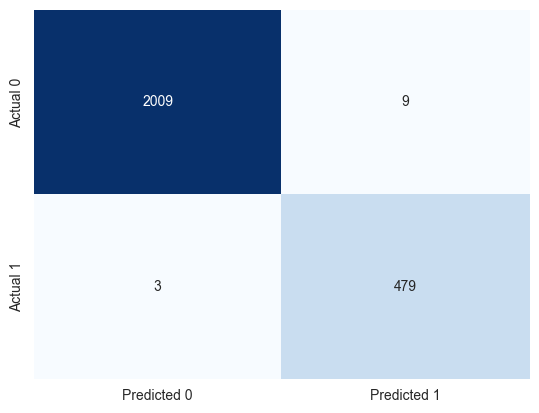

In [29]:
probability_of_default_decision_tree(df_loan_data_cleaned)

In [68]:
def probability_of_default_linear_regression(dataframe:pd.DataFrame):
    X_independent_vars = dataframe.iloc[:, 0:6]
    X_train, X_test, y_train, y_test = train_test_split(X_independent_vars, dataframe['default_expected_loss'], test_size=0.25, random_state=42)
    regression_model = LinearRegression().fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')
    plt.figure(figsize=(16, 9))
    sns.scatterplot(x=X_test['income'], y=y_test, color='g', alpha=0.3, label='true points')
    sns.scatterplot(x=X_test['income'], y=y_pred, color='orange', alpha=0.3, label='predicted points')
    sns.lineplot(x=X_test['income'], y=regression_model.predict(X_test), color='b', label='Regression Line', alpha=0.6, linewidth=0.7)
    return y_pred

Mean Absolute Error: 0.11487450935853674
Mean Squared Error: 0.025508859183545257
R-squared: 0.7976431852364148


array([-0.02402672, -0.07186457,  0.81736313, ...,  0.08772455,
        0.01399861,  0.07676884])

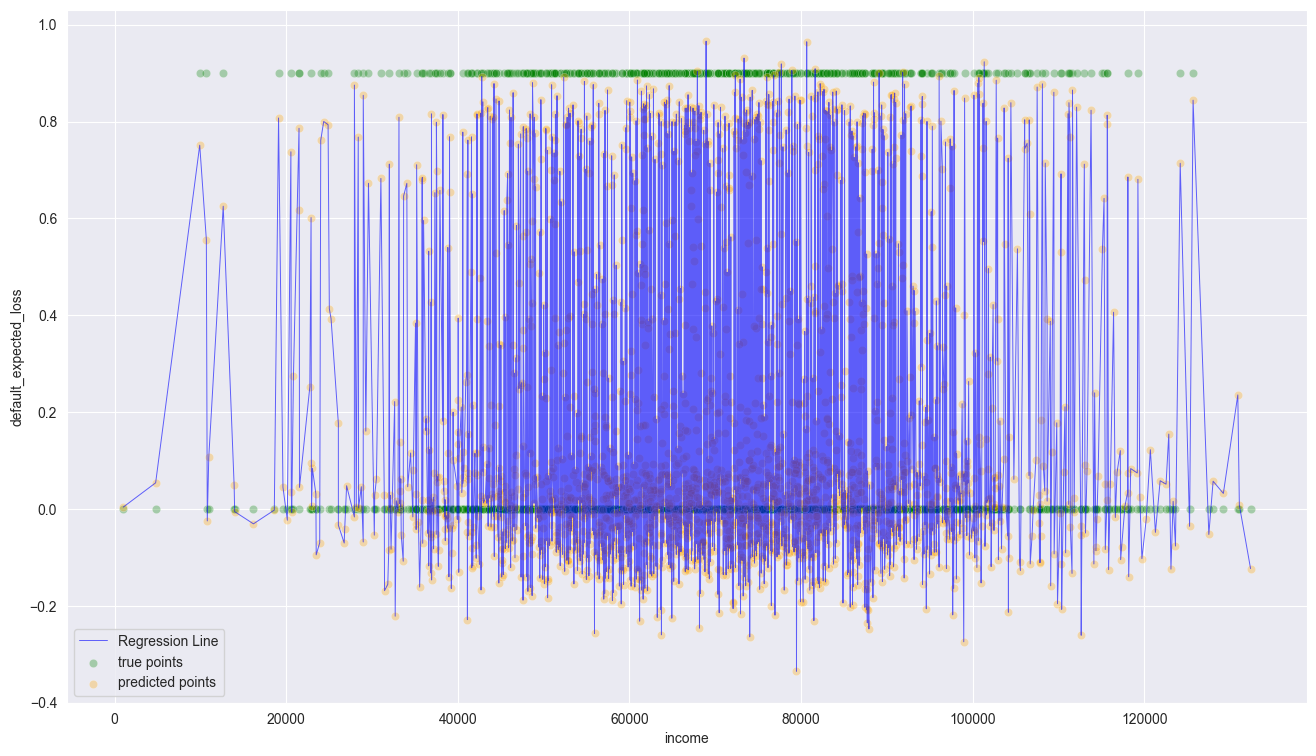

In [69]:
probability_of_default_linear_regression(df_loan_data_cleaned)

In [70]:
def probability_of_default_rf_regressor(dataframe:pd.DataFrame):
    X_independent_vars = dataframe.iloc[:, 0:6]
    X_train, X_test, y_train, y_test = train_test_split(X_independent_vars, dataframe['default_expected_loss'], test_size=0.25, random_state=42)
    regression_model = RandomForestRegressor().fit(X_train, y_train)
    y_pred = regression_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')
    plt.figure(figsize=(16, 9))
    sns.scatterplot(x=X_test['income'], y=y_test, color='g', alpha=0.3, label='true points')
    sns.scatterplot(x=X_test['income'], y=y_pred, color='orange', alpha=0.3, label='predicted points')
    sns.lineplot(x=X_test['income'], y=regression_model.predict(X_test), color='b', label='Regression Line', alpha=0.6, linewidth=0.7)
    return y_pred

Mean Absolute Error: 0.0064260000000003845
Mean Squared Error: 0.0028705428000000022
R-squared: 0.9772285427007554


array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

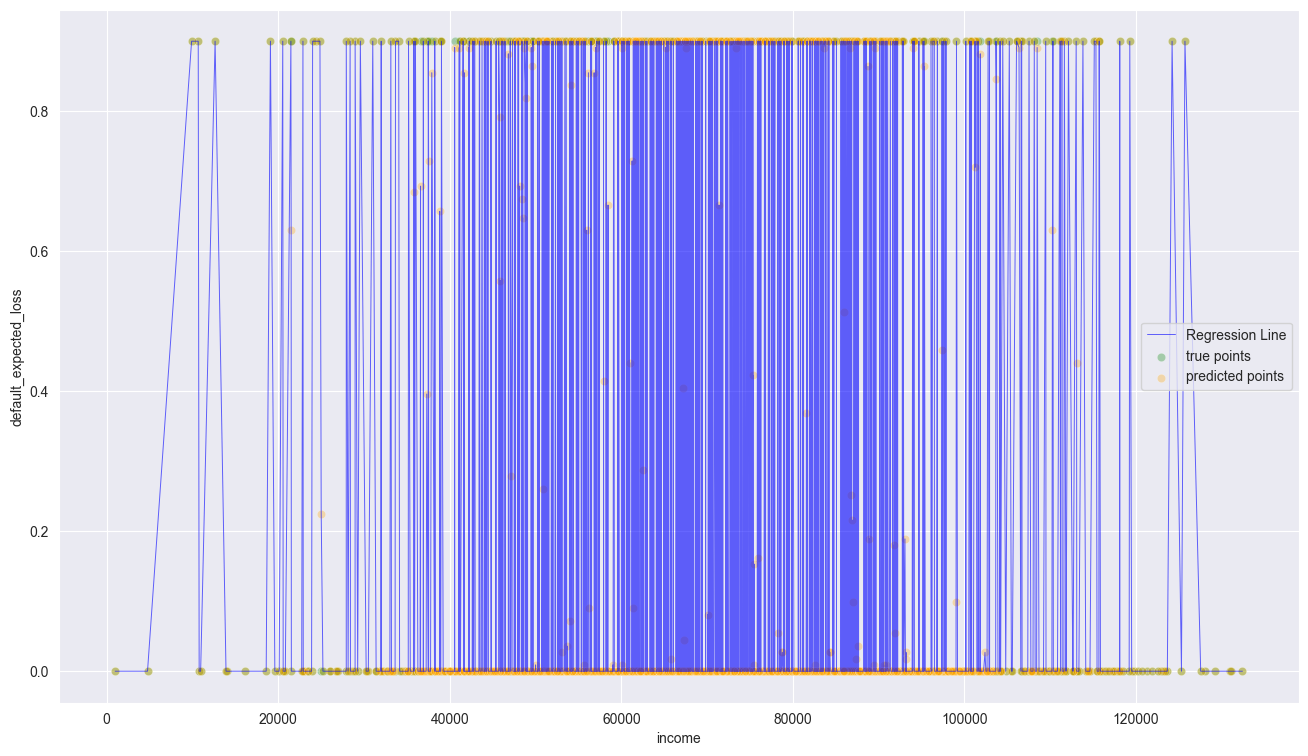

In [71]:
probability_of_default_rf_regressor(df_loan_data_cleaned)

In [26]:
def probability_of_default_rf_classifier(dataframe:pd.DataFrame):
    X_independent_vars = dataframe.iloc[:, 0:6]
    X_train, X_test, y_train, y_test = train_test_split(X_independent_vars, dataframe['default'], test_size=0.25, random_state=42)
    classification_model = RandomForestClassifier().fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n {conf_matrix}')
    y_pred = np.where(y_pred == 1.0, 0.9, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    return y_pred

Accuracy: 1.00
Mean Absolute Error: 0.0048
Mean Squared Error: 0.0048
R-squared: 0.9691572527748191
Confusion Matrix:
 [[2010    8]
 [   4  478]]


array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

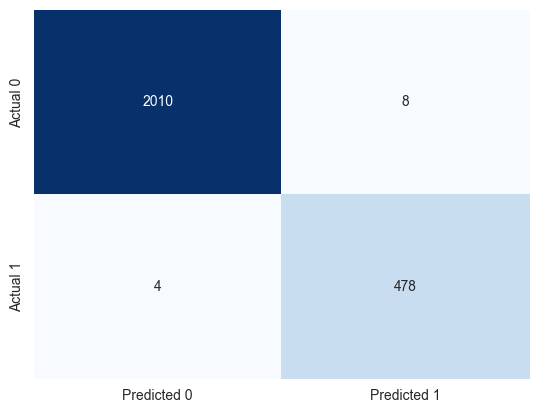

In [27]:
probability_of_default_rf_classifier(df_loan_data_cleaned)

In [24]:
def probability_of_default_logistic_regression(dataframe:pd.DataFrame):
    X_independent_vars = dataframe.iloc[:, 0:6]
    X_train, X_test, y_train, y_test = train_test_split(X_independent_vars, dataframe['default'], test_size=0.25, random_state=42)
    classification_model = LogisticRegression().fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Mean Absolute Error: {mae}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared: {r2}')
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n {conf_matrix}')
    y_pred = np.where(y_pred == 1.0, 0.9, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    return y_pred

Accuracy: 1.00
Mean Absolute Error: 0.002
Mean Squared Error: 0.002
R-squared: 0.9871488553228414
Confusion Matrix:
 [[2016    2]
 [   3  479]]


C:\Users\mitlonginus\anaconda3\envs\integrate\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0. , 0. , 0.9, ..., 0. , 0. , 0. ])

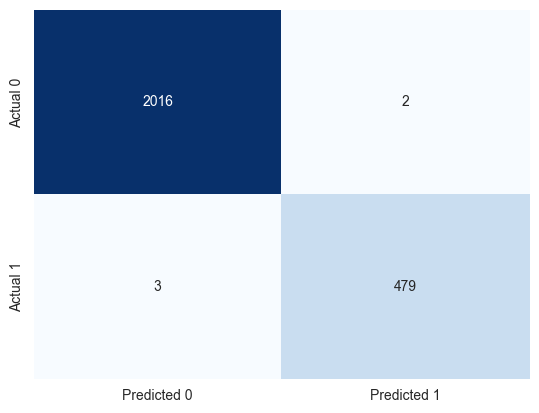

In [25]:
probability_of_default_logistic_regression(df_loan_data_cleaned)